In [1]:
from tsutils import get_jena, WindowGenerator, compile_and_fit
import tensorflow as tf

# Split Data

In [2]:
df = get_jena()

In [3]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168,-0.614587,-0.138503,0.258819,0.965926,0.010049,0.999950
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,-0.245971,-0.044701,-0.619848,-0.112645,0.500000,0.866025,0.010766,0.999942
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,-0.175527,0.039879,-0.614344,0.139576,0.707107,0.707107,0.011483,0.999934
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,-0.050000,-0.086603,-0.190000,-0.329090,0.866025,0.500000,0.012199,0.999926
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,-0.368202,0.156292,-0.810044,0.343843,0.965926,0.258819,0.012916,0.999917


In [4]:
df.shape

(70091, 19)

We will use a 70%, 20%, 10% train/validation/test split.

In [5]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

# num_features = df.shape[1]

In [6]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

# Test `WindowGenerator`

In [7]:
w = WindowGenerator(14, 1, 7, train_df, val_df, test_df, ['T (degC)'])

In [8]:
w

Total window size: 21
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Label indices: [20]
Label column name(s): ['T (degC)']

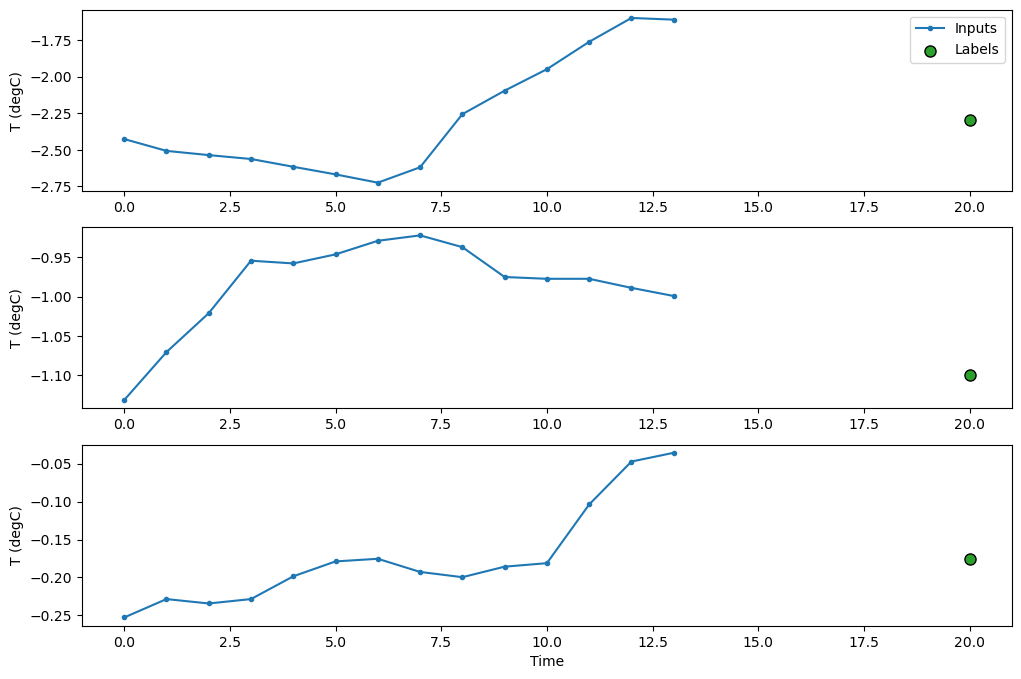

In [10]:
w.plot('T (degC)')

# Make Forecast Model

In [11]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dropout(0.5),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [13]:
history = compile_and_fit(lstm_model, w, 20, 5)

Epoch 1/20


2022-12-06 13:01:05.298494: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


1533/1533 [==============================] - 19s 9ms/step - loss: 0.1533 - mean_absolute_error: 0.2918 - val_loss: 0.0648 - val_mean_absolute_error: 0.1964
Epoch 2/20
1533/1533 [==============================] - 17s 11ms/step - loss: 0.0991 - mean_absolute_error: 0.2419 - val_loss: 0.0620 - val_mean_absolute_error: 0.1916
Epoch 3/20
1533/1533 [==============================] - 21s 14ms/step - loss: 0.0927 - mean_absolute_error: 0.2335 - val_loss: 0.0581 - val_mean_absolute_error: 0.1858
Epoch 4/20
1533/1533 [==============================] - 17s 11ms/step - loss: 0.0900 - mean_absolute_error: 0.2292 - val_loss: 0.0556 - val_mean_absolute_error: 0.1809
Epoch 5/20
1533/1533 [==============================] - 17s 11ms/step - loss: 0.0869 - mean_absolute_error: 0.2255 - val_loss: 0.0539 - val_mean_absolute_error: 0.1778
Epoch 6/20
1533/1533 [==============================] - 19s 12ms/step - loss: 0.0851 - mean_absolute_error: 0.2229 - val_loss: 0.0570 - val_mean_absolute_error: 0.1825
Epoc